# Intro to Neural Networks in Python

Overview of the project: 

The goal is to train a neural network classifier on the MNIST image data. The MNIST data are handwritten digits (manually classified) and we want to train the neural network to automatically label these digits for us. In this project we will not be using fancy (normal) libraries like NumPy so we have to make the functions for algebra ourselves.

What we have done for you: 

1. Download data from MNIST. This is already done and is in (t10k-images.idx3-ubyte.gz, t10k-labels.idx1-ubyte.gz, train-images.idx3-ubyte.gx, train-labels.idx1-ubyte). As you can perhaps tell from the file names the data is already split into test and training data-sets. 

2. Read image data (pixel values) and labels (hand-labels of correct digit). This will not be one of your tasks. The data is in a weird format and you will be using our functions (read_image, read_labels) to get the data into python in a nice format. 

We can import these functions from the python file "read_write_helper" into this notebook like this: 


In [5]:
from read_write_helper import *

These are the included helper function to make your life easier. Here we call on the help-function, which prints the documentation for the function. From read_write_helper the functions are *read_image*, *read_labels*, *linear_load*, *linear_save* and *image_to_vector*.

### read_image

This function reads the image data from the MNIST-database. Returns a list of the image data and prints if the magic number is 2051 (which it should be for some reason). 

### read_labels

This function reads the labels from the MNIST-database. Returns a list of labels and prints a message if the magic number is 2049 (again, this is somehow desirable).



## "Help" function:

If you ever forget these, or any other function in Python, calling the *help* function will enable you to read the documentation for the function. These functions are written by us, so for actual libraries you will find better documentation.



In [6]:
help(read_image)

Help on function read_image in module read_write_helper:

read_image(filename)
    Description:
    
    Using the struct.unpack function, this function reads 
    the image data from the MNIST-database. 
    
    Assumes that the data is stored in the same folder
    as this document.
    
    Returns a list of the image data and print message 
    if the magic number is 2051.
    
    ________
    
    Arguments: 
    
    filename = name of the file as a string



## Background

### Lists to Matrices 

$$[[1,2,3], [4,5,6]] = \begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{pmatrix} $$

### Data 

1. 28x28 (square) pixel-values. 
2. 

## Creating Math Functions

1. Addition of Matrices
2. Matrix Multiplication

Both of these are necessary for us to predict data (as we will see). <br/>
Try to do the calculation by hand first to understand the algorithm to implement. This is really helpful actually.

1. Addition: <br/>
First we create a function which can add two matrices together. <br/>
Recall what has to be the case in order for addition of 
matrices (or vectors) to be possile. <br/>
You will want to be indexing and use for-loops unless you are some evil genius.

In [8]:
def addition(S, O): 
    '''
    Description:

    Adds a matrix to another matrix. 
    In terms of linear algebra, this corresponds
    to the operation S + O, where both S and O are matrices.

    Assumes that both matrices have: 
    (1) the same number of rows and columns 
    (2) 2 dimensions when understood as lists

    Returns a new list of lists, corresponding to the result
    of the addition of the two matrices.
    ________

    Arguments:

    S = list of lists with 2 dimensions
    O = list of lists with 2 dimensions
    ________

    Examples:

    >>> add([[1, 2, 3], [3, 4, 5], [5, 6, 7]], [[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    [[2, 4, 6], [7, 9, 11], [12, 14, 16]]

    '''
    
    #your code goes here

In [18]:
A = [[1, 2, 3], [3, 4, 5], [5, 6, 7]]
B = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

def add(A, B): 
    newlist = []
    for i in range(len(A)): ## number of rows.
        nonlist = []
        for j in range(len(A[0])): ## number of columns.
            nonlist.append(A[i][j] + B[i][j])
        newlist.append(nonlist)
    return newlist

add(A, B)

[[2, 4, 6], [7, 9, 11], [12, 14, 16]]

2. Matrix Multiplication: 
We now create a function for matrix multiplication <br/>
Again, recall the format needed and the algorithm for 
computing matrix multiplication (what we did by hand in 
the first session). <br/>
You will want to be indexing and use for-loops unless you are some evil genius.

In [19]:
def multiply(S, O):
    '''
    Description:

    Multiplies a matrix with another matrix. 
    In terms of linear algebra, this corresponds to
    the matrix product of S * O, where S and O are both matrices.
    
    Assumes that S and O are lists of lists with 2 dimensions, 
    and that the number of columns in S is the same as 
    the number of rows in O.
    
    Returns a list of lists, corresponding to matrix product of 
    S * O. 

    ________

    Arguments:

    S = list of lists with 2 dimensions
    O = list of lists with 2 dimensions
    ________

    Examples:

    >>> multiply([[1, 2, 3], [4, 5, 6]], [[2, 3], [4, 5], [6, 7]])
    [[28, 34], [64, 79]]

    >>> multiply([[2, 3], [4, 5], [6, 7]], [[1, 2, 3], [4, 5, 6]])
    [[14, 19, 24], [24, 33, 42], [34, 47, 60]]

    '''
    
    # your code goes here

In [25]:
A = [[1, 2, 3], [4, 5, 6]]
B = [[2, 3], [4, 5], [6, 7]]

def multiply(S, O):
    master_list = []
    for i in range(len(A)):
        sub_list = []
        for j in range(len(B[0])): #columns in B.
            sub_sum = 0
            for k in range(len(A[0])): #columns in A.
                sub_sum += A[i][k] * B[k][j]
            sub_list.append(sub_sum)
        master_list.append(sub_list)
    return master_list
                

## Predicting 

Now we will use the functions from before (addition and matrix multiplication). <br/>
First you will try to make the function work on dummy data, then you will
test it out on real data. <br/>
The format is a bit funky here. <br/>

A neural network consists of weights and biases [text goes here]. 
network will be in the format: [[[2,3],[2,2],[1,2],[1,2]],[2,3]] where 
A (weights) = [[2,3],[2,2],[1,2],[1,2]] and b (biases) = [2,3]. This can be unpacked like this: <br/>
A, b = [[[2,3],[2,2],[1,2],[1,2]],[2,3]] <br/>

The image to predict will be in the format: [1,2,4,0]. <br/>

The way we predict a case (an image) from our network is as follows: 
1. multiply the image vector with A (weights). Use your function from earlier, or the function "multiply" from math_helper.
2. add b (bias) to the product from point 1 (above). Use your function from earlier, or the function "add" from math_helper. 
3. unlist and return. 



In [35]:
def predict(network, image):
    '''
    Description:
    Multiplies an image vector with the weights of a given 
    network, and adds this product with the bias of the network.
    This corresponds to the networks prediction of what 
    the image is.

    Assumes that network is a nested list, consisting
    of two lists of list. The first containing the weights of 
    the network, and the second containing the bias of 
    the network.

    Returns a list of length equal to b (bias vector).

    ________

    Arguments:
    image = image vector (list) of one dimension.
    network = list of lists two sublists. The first being 
    a list of lists containing the weights of the network. The 
    containing the bias of the network. 

    ________

    Examples:
    >>> predict([[[2,3],[2,2],[1,2],[1,2]],[2,3]], [1,2,4,0])
    [12, 18]

    '''
    
    A, b = network 
    image = [image] # A quirk of the format. 
    b = [b] # A quirk of the format. 
    
    # your code goes here

In [45]:
## creating the function.
def pred(network, image): 
    A, b = network 
    b = [b]
    image = [image]
    xA = multiply(image, A)
    xAb = add(xA, b)
    xAb_unlisted = xAb[0]
    return xAb_unlisted

## testing on the docstring case.
network = [[[2,3],[2,2],[1,2],[1,2]],[2,3]]
image = [1,2,4,0]

pred(network, image)

[12, 18]

## Predicting (real data)

1. first we load images (train-images). <br/>
2. then we load a pre-trained neural network (mnist_linear.weights). 

In [49]:
images = read_image("train-images.idx3-ubyte")
network = linear_load("mnist_linear.weights")
A, b = network

The Magic Number is 2051!


3. Now we import functionality from math_helper (for instance the "dim" function). 

In [39]:
from math_helper import * 

4. Now we can check the dimensions of the data that we are working with. <br/>
5. under "test your function" you can test your function.

In [51]:
## check the data: 
print(dim(images)) # 60k images.
print(dim(A)) # 784 rows, 10 columns (one weight vector for each digit).
print(dim(b)) # 10 columns (one bias for each digit).

## select one image: 
image = images[0] ## selecting the first image. 
image = image_to_vector(image) ## converts the format from 28x28 to 1x784

## test your function: 
your_function(network, image)


[60000, 28, 28]
[784, 10]
[1, 10]


[-10.891113825719207,
 -17.10980191623664,
 -9.640442102355767,
 -3.775869240193608,
 -18.550897116884226,
 -3.3237878850636093,
 -20.739307208739987,
 -12.15975060398581,
 -10.184832443638163,
 -13.12827064162577]


## Mean squared error (loss function)

Mean squared error is a measure of the distance between the predictions and 
the ground truth. This is what we will want to minimize (it will act as our
loss function). This will be necessary for updating the neural network 
via. gradient descent. <br/>
1. How do we square a number in python? 


In [27]:
def mean_square_error(U, V):
    '''
    Description:

    Calculates the mean square error between two lists.
    Raises a TypeError if either input is not a list, or
    if the two lists do not have the same length. 
    
    Assumes that U and V are both lists of one dimension.
    
    Returns a single number, which is the average of the 
    squared sum of the element-wise difference between the 
    two lists. 

    ________

    Arguments:
    
    U = list of 1 dimension
    V = list of 1 dimension
    ________

    Examples:

    >>> mean_square_error([1,2,3,4], [3,1,3,2])
    2.25

    '''
    
    # your code goes here

In [34]:
prediction = [1,2,3,4]
truth = [3,1,3,2] 

def MSE(U, V): 
    return sum([(U[i]-V[i])**2 for i in range(len(U))])/len(U)

MSE(prediction, truth)

2.25

## Evaluating

We will want to evaluate how good our network is at classifying digits. <br/>
Use the predict function made earlier. 

In [52]:
def evaluate(network, images, labels):
    '''
    Description:

    Evaluates the predictions made by a network on a list
    of images and their corresponding labels. 
    This evaluation is made on the basis of using 
    mean square error as a cost function. 
    The function calculates the mean cost as well as the 
    mean accuracy. Mean accuracy is given in percent.

    Assumes that the images and labels correspond i.e.
    image[i] has label labels[i]. 

    Returns a tuple (predictions, cost, accuracy), where 
    predictions is a list of all the predictions made,
    cost is a float representing the mean cost of predictions
    and accuracy is the percentage of correct predictions.

    ________

    Arguments: 
    image = list of images (60k)
    network = list of lists two sublists. The first being 
    a list of lists containing the weights of the network. The 
    containing the bias of the network. 
    labels = list of labels

    '''
    
    ## your code goes here

Read stuff.

In [61]:
images = read_image("train-images.idx3-ubyte")
labels = read_labels("train-labels.idx1-ubyte")
network = linear_load("mnist_linear.weights")


The Magic Number is 2051!
The Magic Number is 2049!


In [64]:
def evalu(network, images, labels): 
    
    ## you will need this 
    
    # argmax (the prediction of the network - the digit it believes in the most) [in slides]
    # categorical (from a label (e.g. "6") to a vector) [in slides]
    
    predictions = []
    cost = 0
    accuracy = 0
    
    for i in range(len(images)): # we predict for each of the 60k train images and compute cost & accuracy.
        current_image = image_to_vector(images[i])
        prediction = predict(network, current_image)
        correct_vector = categorical(labels[i]) #categorical from math_helper. 
        max_prediction = argmax(prediction) 
        
        ## for accuracy 
        if max_prediction == labels[i]: 
            accuracy += 1 
        
        ## for cost (mean_square error from math_helper)
        cost += mean_square_error(correct_vector, prediction)
        
        ## predictions 
        predictions.append(max_prediction)
    
    accuracy = (accuracy / len(labels)) * 100
    cost = cost / len(images)
    
    return (predictions, cost, accuracy)
    

In [68]:
## Try it out
evalu(network, images[0:100], labels[0:100]);

## Training the Neural Network



First we import stuff [get back here]

In [69]:
from network_helper import *

In [71]:
def fast_learn(images, labels, epochs, batch_size):
    '''
    Description:

    Initializes a network consisting of random weights and
    biases. The network is then trained using the "update"
    function over a batch of images and labels.
    For each epoch, the images are partioned
    into smaller batches of images and labels.
    The network is succesively updated for each batch.

    Furthermore, the function prints what
    epoch and batch number it is currently training on.
    This is followed by another print, which is the
    accuracy of the updated network and the accuracy
    of the previous network.

    Returns the best performing network in terms of accuracy
    ________

    Arguments:

    images = list of images
    labels = list of labels
    epochs = integer
    batch_size = integer
    ________
    '''
    
    #initializing the random network:
    b = [random.uniform(0, 1) for m in range(10)]
    A = [[random.uniform(0, 1/784) for n in range(10)] for n in range(784)]
    network = [A, b]
    prev_acc = 0

    print("******** STARTING TO LEARN ********")

    for e in range(epochs):
        batch_number = 0
        batches = create_batches(list(range(len(images))), batch_size)

        for i in batches:
            batch_number += 1
            one_img_batch = [images[j] for j in i]
            one_lab_batch = [labels[j] for j in i]
            print(f"Current Epoch: {e+1} | Current batch: {batch_number}\n_____________________________________")
            network = update(network, one_img_batch, one_lab_batch, sigma = 0.1)
    print("******** FINISHED LEARNING ********")
    return network

In [75]:
images = read_image("train-images.idx3-ubyte")
labels = read_labels("train-labels.idx1-ubyte")
batch_size = 100
epochs = 5

The Magic Number is 2051!
The Magic Number is 2049!


# Together 

## RUNNING THE NETWORK

Here we are only training on a subset of the training data (10k images instead of 60k). <br/>
This is because it takes time to run (but this will make it less accurate of course). <br/>
It should take a couple of minutes to run. <br/>

**batch_size:** the number of pictures in each training batch. <br/>
**epochs:** the number of times we run through ALL of the data.

In [77]:
network = fast_learn(images[:10000], labels[:10000], epochs, batch_size);

******** STARTING TO LEARN ********
Current Epoch: 1 | Current batch: 1
_____________________________________
Current Epoch: 1 | Current batch: 2
_____________________________________
Current Epoch: 1 | Current batch: 3
_____________________________________
Current Epoch: 1 | Current batch: 4
_____________________________________
Current Epoch: 1 | Current batch: 5
_____________________________________
Current Epoch: 1 | Current batch: 6
_____________________________________
Current Epoch: 1 | Current batch: 7
_____________________________________
Current Epoch: 1 | Current batch: 8
_____________________________________
Current Epoch: 1 | Current batch: 9
_____________________________________
Current Epoch: 1 | Current batch: 10
_____________________________________
Current Epoch: 1 | Current batch: 11
_____________________________________
Current Epoch: 1 | Current batch: 12
_____________________________________
Current Epoch: 1 | Current batch: 13
____________________________________

Current Epoch: 2 | Current batch: 10
_____________________________________
Current Epoch: 2 | Current batch: 11
_____________________________________
Current Epoch: 2 | Current batch: 12
_____________________________________
Current Epoch: 2 | Current batch: 13
_____________________________________
Current Epoch: 2 | Current batch: 14
_____________________________________
Current Epoch: 2 | Current batch: 15
_____________________________________
Current Epoch: 2 | Current batch: 16
_____________________________________
Current Epoch: 2 | Current batch: 17
_____________________________________
Current Epoch: 2 | Current batch: 18
_____________________________________
Current Epoch: 2 | Current batch: 19
_____________________________________
Current Epoch: 2 | Current batch: 20
_____________________________________
Current Epoch: 2 | Current batch: 21
_____________________________________
Current Epoch: 2 | Current batch: 22
_____________________________________
Current Epoch: 2 | Curren

Current Epoch: 3 | Current batch: 20
_____________________________________
Current Epoch: 3 | Current batch: 21
_____________________________________
Current Epoch: 3 | Current batch: 22
_____________________________________
Current Epoch: 3 | Current batch: 23
_____________________________________
Current Epoch: 3 | Current batch: 24
_____________________________________
Current Epoch: 3 | Current batch: 25
_____________________________________
Current Epoch: 3 | Current batch: 26
_____________________________________
Current Epoch: 3 | Current batch: 27
_____________________________________
Current Epoch: 3 | Current batch: 28
_____________________________________
Current Epoch: 3 | Current batch: 29
_____________________________________
Current Epoch: 3 | Current batch: 30
_____________________________________
Current Epoch: 3 | Current batch: 31
_____________________________________
Current Epoch: 3 | Current batch: 32
_____________________________________
Current Epoch: 3 | Curren

Current Epoch: 4 | Current batch: 30
_____________________________________
Current Epoch: 4 | Current batch: 31
_____________________________________
Current Epoch: 4 | Current batch: 32
_____________________________________
Current Epoch: 4 | Current batch: 33
_____________________________________
Current Epoch: 4 | Current batch: 34
_____________________________________
Current Epoch: 4 | Current batch: 35
_____________________________________
Current Epoch: 4 | Current batch: 36
_____________________________________
Current Epoch: 4 | Current batch: 37
_____________________________________
Current Epoch: 4 | Current batch: 38
_____________________________________
Current Epoch: 4 | Current batch: 39
_____________________________________
Current Epoch: 4 | Current batch: 40
_____________________________________
Current Epoch: 4 | Current batch: 41
_____________________________________
Current Epoch: 4 | Current batch: 42
_____________________________________
Current Epoch: 4 | Curren

Current Epoch: 5 | Current batch: 40
_____________________________________
Current Epoch: 5 | Current batch: 41
_____________________________________
Current Epoch: 5 | Current batch: 42
_____________________________________
Current Epoch: 5 | Current batch: 43
_____________________________________
Current Epoch: 5 | Current batch: 44
_____________________________________
Current Epoch: 5 | Current batch: 45
_____________________________________
Current Epoch: 5 | Current batch: 46
_____________________________________
Current Epoch: 5 | Current batch: 47
_____________________________________
Current Epoch: 5 | Current batch: 48
_____________________________________
Current Epoch: 5 | Current batch: 49
_____________________________________
Current Epoch: 5 | Current batch: 50
_____________________________________
Current Epoch: 5 | Current batch: 51
_____________________________________
Current Epoch: 5 | Current batch: 52
_____________________________________
Current Epoch: 5 | Curren

## Evaluating the Network

In [79]:
test_images = read_image("t10k-images.idx3-ubyte")
test_labels = read_labels("t10k-labels.idx1-ubyte")

The Magic Number is 2051!
The Magic Number is 2049!


In [84]:
evaluate(network, test_images, test_labels) #evaluate did not work?

([7,
  2,
  1,
  0,
  4,
  1,
  4,
  9,
  4,
  7,
  0,
  0,
  9,
  0,
  1,
  3,
  9,
  7,
  3,
  4,
  9,
  6,
  1,
  5,
  4,
  0,
  7,
  4,
  0,
  1,
  3,
  1,
  3,
  0,
  7,
  2,
  7,
  1,
  3,
  1,
  1,
  7,
  4,
  2,
  3,
  3,
  3,
  2,
  4,
  4,
  6,
  3,
  5,
  3,
  4,
  0,
  4,
  1,
  9,
  5,
  7,
  8,
  9,
  2,
  7,
  9,
  1,
  4,
  3,
  0,
  7,
  0,
  2,
  1,
  1,
  7,
  3,
  7,
  9,
  7,
  9,
  6,
  2,
  7,
  8,
  4,
  7,
  3,
  6,
  1,
  3,
  6,
  9,
  3,
  1,
  4,
  1,
  1,
  6,
  9,
  6,
  0,
  5,
  4,
  9,
  9,
  2,
  1,
  9,
  4,
  8,
  1,
  3,
  9,
  7,
  4,
  4,
  4,
  9,
  2,
  3,
  4,
  7,
  6,
  4,
  9,
  0,
  5,
  8,
  5,
  6,
  6,
  5,
  7,
  8,
  1,
  0,
  1,
  6,
  4,
  6,
  7,
  3,
  1,
  7,
  1,
  8,
  2,
  0,
  9,
  9,
  4,
  5,
  5,
  1,
  5,
  6,
  0,
  3,
  4,
  4,
  6,
  5,
  4,
  6,
  5,
  4,
  3,
  1,
  4,
  4,
  7,
  2,
  3,
  2,
  9,
  1,
  8,
  1,
  8,
  1,
  8,
  5,
  0,
  8,
  9,
  2,
  3,
  0,
  1,
  1,
  5,
  0,
  3,
  0,
  3,
  1,
  6,
  4,
  2,


## Plotting stuff

In [85]:
from plots_helper import * 

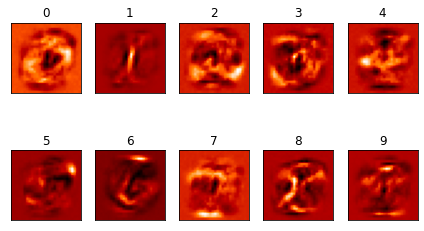

In [88]:
weights_plot(network[0]); #the network we just trained..

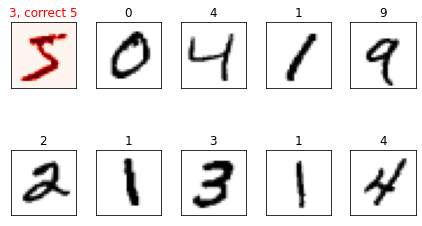

In [93]:
plot_images_new(images[:10], labels[:10], predictions = [argmax(predict(network, image_to_vector(i))) for i in images[:10]]);